In [3]:
import pandas as pd
import numpy as np
from operator import itemgetter, attrgetter
from geopy.distance import geodesic
from geopy import distance
import datetime
import math
from math import radians, cos, sin, asin, sqrt, ceil
from numpy import nan as NaN
import time

In [2]:
wagon_info = pd.read_csv("C:\\Users\\qiusu\\JupyterNotebook\\Daten\\Output_Daten\\01_Output.csv")
wagon_info_country = pd.read_csv("C:\\Users\\qiusu\\JupyterNotebook\\Daten\\Country_Daten\\country01_Output_TUDA_data.csv")
for index in range(2,46):
    wagon_info_1= pd.read_csv("C:\\Users\\qiusu\\JupyterNotebook\\Daten\\Output_Daten\\{:02}_Output.csv".format(index))
    wagon_info_country_1 = pd.read_csv("C:\\Users\\qiusu\\JupyterNotebook\\Daten\\Country_Daten\\country{:02}_Output_TUDA_data.csv".format(index))
    wagon_info=pd.concat([wagon_info,wagon_info_1],ignore_index=True)  
    wagon_info_country=pd.concat([wagon_info_country,wagon_info_country_1],ignore_index=True)    
                                 
                                   
                                       

In [9]:
wagon_info.groupby(['loading_state'],as_index=False).agg({'Distance':'sum'})

,loading_state,Distance
0,Beladen,1.296910e+12
1,Leer,8.611855e+11


In [49]:
wagon_info_total_country= wagon_info_country.groupby(['country'],as_index=False).agg({'Distance':'sum'})

wagon_info_total_country.to_csv("C:\\Users\\qiusu\\JupyterNotebook\\Daten\\Country_Daten\\Total_country_Output_TUDA_data.csv") 

In [7]:
wagon_info_total_country=pd.read_csv("C:\\Users\\qiusu\\JupyterNotebook\\Daten\\Country_Daten\\Total_country_Output_TUDA_data.csv")
wagon_info_total_country.iloc[32,1]='Republic of Macedonia'
wagon_info_total_country.sort_values(by=["Distance"],inplace=True,ascending=False)
wagon_info_total_country

,Unnamed: 0,country,Distance
11,11,Germany,1.618270e+12
15,15,Italy,8.770148e+10
19,19,Netherlands,7.559657e+10
0,0,Austria,6.020718e+10
31,31,Switzerland,5.632442e+10
10,10,France,5.443095e+10
21,21,Poland,4.839295e+10
30,30,Sweden,4.347877e+10
6,6,Czech Republic,2.458307e+10
7,7,Denmark,2.025031e+10


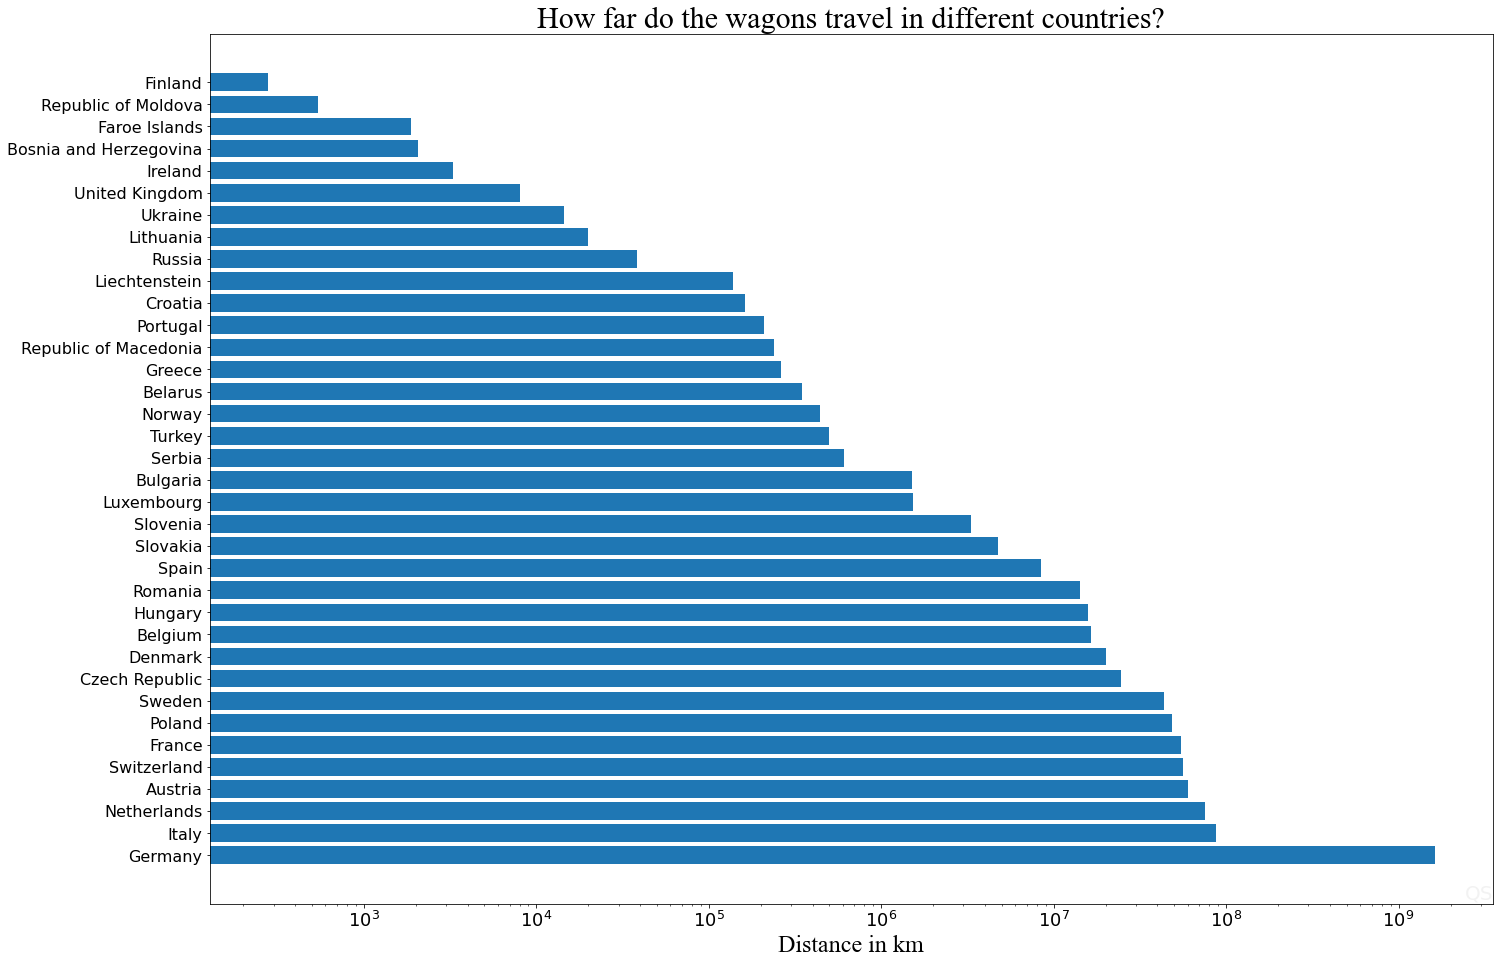

In [8]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker 


x = wagon_info_total_country['country']
y = wagon_info_total_country['Distance']/1000



fig = plt.figure(figsize=(23, 16))

plt.xscale("log")


plt.title("How far do the wagons travel in different countries?",fontdict={'family' : 'Times New Roman', 'size'   : 30})
plt.yticks(size = 16 )
plt.xticks( size = 18)
fig.text(0.9, 0.125, 'QS', fontsize=20, color='gray',ha='right', va='bottom', alpha=0.1)
plt.xlabel('Distance in km', fontdict={'family' : 'Times New Roman', 'size'   : 24})
plt.barh(x,y)
plt.savefig('./How far_countries.jpg')
plt.show()

